scipy使用

0.0	0.0
100.0	33.258
200.0	33.473
250.0	34.216
298.15	35.639
300.0	35.708
350.0	37.874
...	...


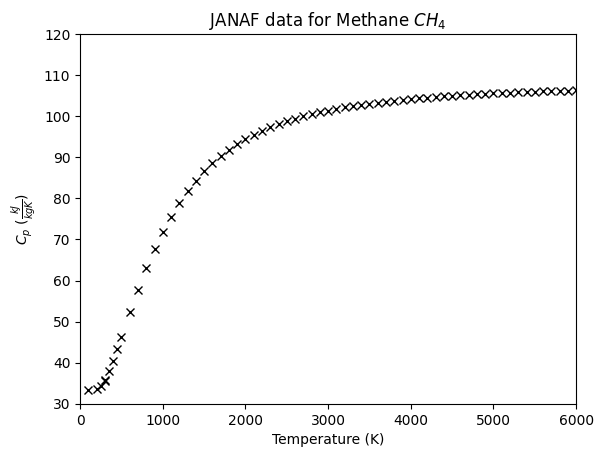

In [38]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import linalg, optimize


from io import StringIO

# f = StringIO("JANAF_CH4.txt")

data = np.genfromtxt('JANAF_CH4.txt', 
                  delimiter="\t", # TAB 分隔
                  skip_header=1,     # 忽略首行
                  names=True,     # 读入属性
                  missing_values="INFINITE",  # 缺失值
                  filling_values=np.inf)      # 填充缺失值

for row in data[:7]:
    print("{}\t{}".format(row['TK'], row['Cp']))
print ("...\t...")

p = plt.plot(data['TK'], data['Cp'], 'kx')
t = plt.title("JANAF data for Methane $CH_4$")
a = plt.axis([0, 6000, 30, 120])
x = plt.xlabel("Temperature (K)")
y = plt.ylabel(r"$C_p$ ($\frac{kJ}{kg K}$)")

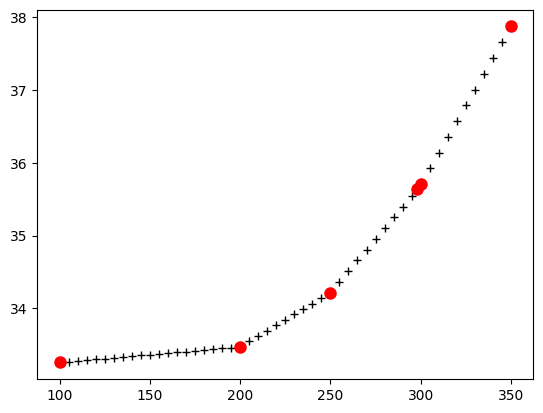

In [39]:
from scipy.interpolate import interp1d

# 默认线性插值
ch4_cp = interp1d(data['TK'], data['Cp'])
T = np.arange(100,355,5)
plt.plot(T, ch4_cp(T), "+k")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

我们可以通过 kind 参数来调节使用的插值方法，来得到不同的结果：

nearest 最近邻插值
zero 0阶插值
linear 线性插值
quadratic 二次插值
cubic 三次插值
4,5,6,7 更高阶插值

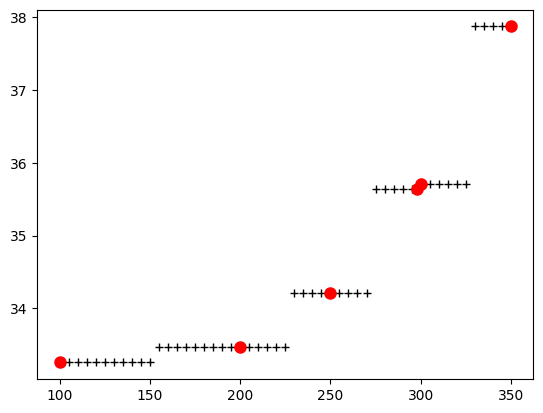

In [40]:
# 最近邻插值
cp_ch4 = interp1d(data['TK'], data['Cp'], kind="nearest")
p = plt.plot(T, cp_ch4(T), "k+")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

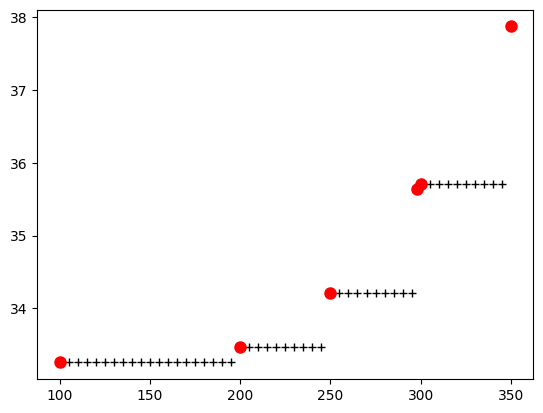

In [41]:
# 0阶插值
cp_ch4 = interp1d(data['TK'], data['Cp'], kind="zero")
p = plt.plot(T, cp_ch4(T), "k+")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

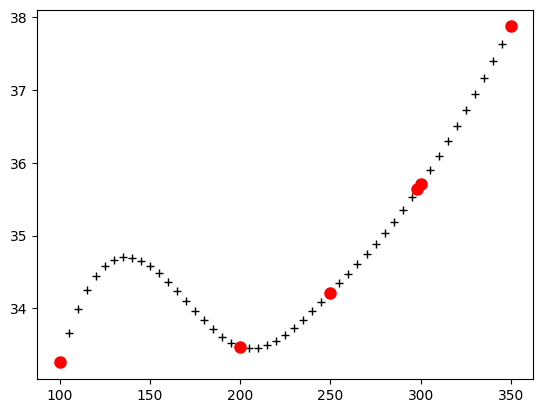

In [44]:
# 三次插值
cp_ch4 = interp1d(data['TK'], data['Cp'], kind="cubic")
p = plt.plot(T, cp_ch4(T), "k+")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)


径向基函数
简单来说，就是点x处的函数值只依赖于x与某点c的距离
Φ(x,c)=Φ(||x−c||)

<StemContainer object of 3 artists>

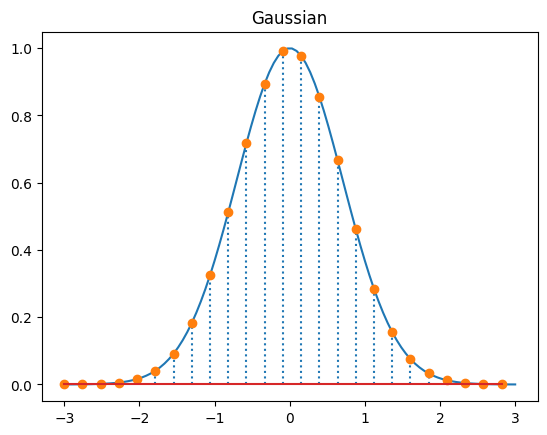

In [77]:
from scipy.interpolate import interp2d, interpnd

x = np.linspace(-3,3,100)
plt.plot(x, np.exp(-1 * x **2))
t = plt.title("Gaussian")

x1=x[::4]
x1
# plt.plot(x1, np.exp(-1*x1**2), "3")
plt.stem(x1, np.exp(-1*x1**2), "3:")

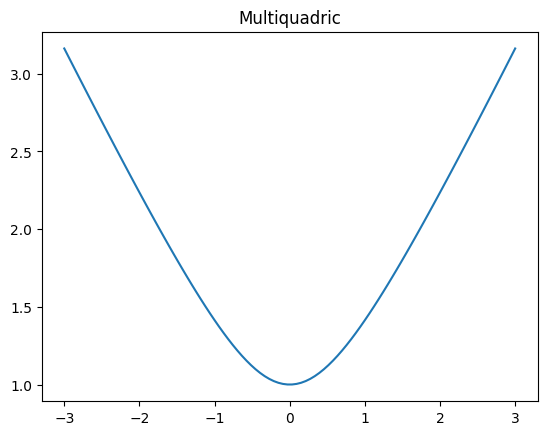

In [46]:
plt.plot(x, np.sqrt(1 + x **2))
t = plt.title("Multiquadric")

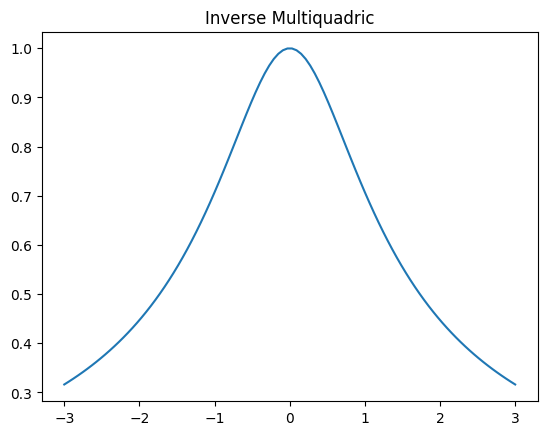

In [47]:
plt.plot(x, 1. / np.sqrt(1 + x **2))
t = plt.title("Inverse Multiquadric")

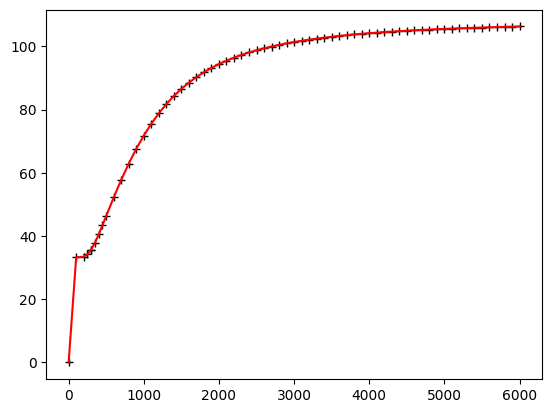

In [49]:
from scipy.interpolate import Rbf

cp_rbf = Rbf(data['TK'], data['Cp'], function = "multiquadric")
plt.plot(data['TK'], data['Cp'], 'k+')
p = plt.plot(data['TK'], cp_rbf(data['TK']), 'r-')


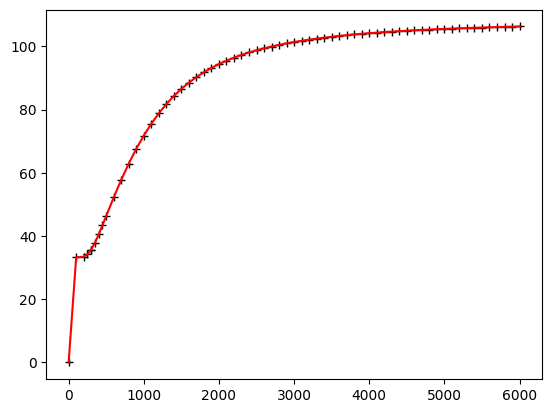

In [52]:
cp_rbf = Rbf(data['TK'], data['Cp'], function = "inverse_multiquadric")
plt.plot(data['TK'], data['Cp'], 'k+')
p = plt.plot(data['TK'], cp_rbf(data['TK']), 'r-')


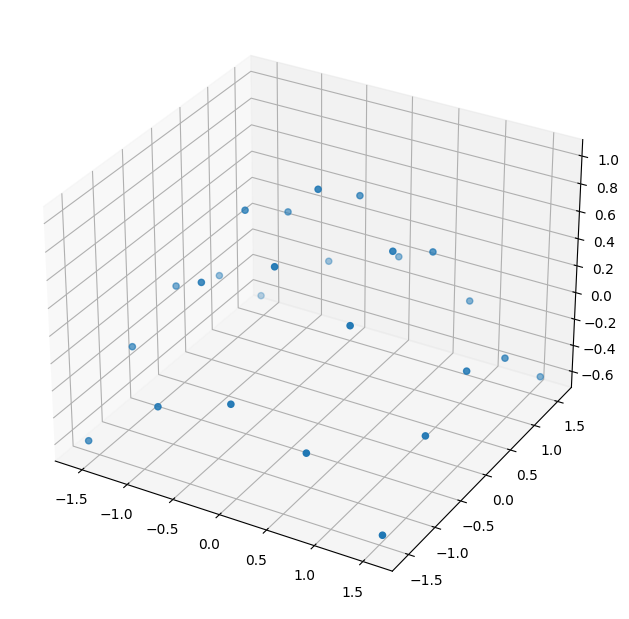

In [55]:
from mpl_toolkits.mplot3d import Axes3D

x, y = np.mgrid[-np.pi/2:np.pi/2:5j, -np.pi/2:np.pi/2:5j]
z = np.cos(np.sqrt(x**2 + y**2))

fig = plt.figure(figsize=(12,6))
# ax = fig.gca(projection="3d")
ax = fig.add_axes(Axes3D(fig))  
ax.scatter(x,y,z)


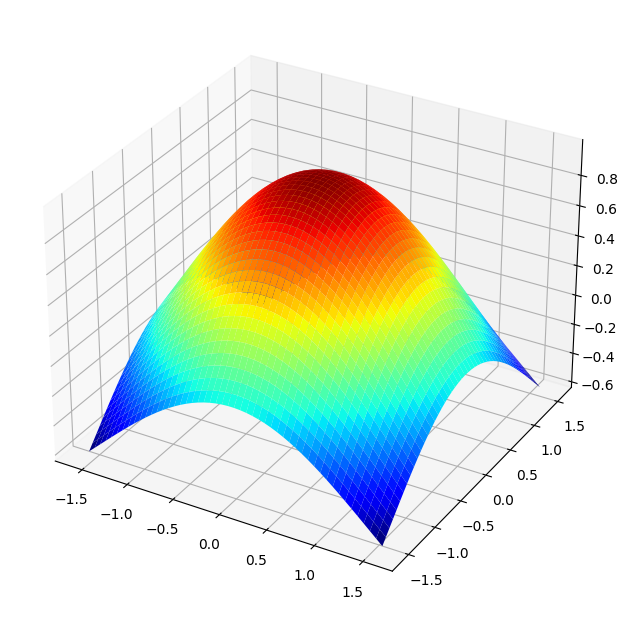

In [56]:
zz = Rbf(x, y, z)
xx, yy = np.mgrid[-np.pi/2:np.pi/2:50j, -np.pi/2:np.pi/2:50j]
fig = plt.figure(figsize=(12,6))
# ax = fig.gca(projection="3d")
ax = fig.add_axes(Axes3D(fig))
ax.plot_surface(xx,yy,zz(xx,yy),rstride=1, cstride=1, cmap=plt.cm.jet)
